# [IAPR][iapr]: Lab 2 ‒  Object description

**Group ID:** 29

**Author 1 (sciper):** Ludovic Pujol (301033)  
**Author 2 (sciper):** Arthur André (287599)   
**Author 3 (sciper):** Octavio Profeta (301450)  

**Release date:** 24.03.2023  
**Due date:** 07.04.2023 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.


[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library. In the `lab-02-data` folder, you will find 28x28 grey-scale pictures of handwritten "0", "1", "2" and "3".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [17]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
data_part1 = os.path.join(data_base_path, data_folder, 'part1')
data_part2 = os.path.join(data_base_path, data_folder, 'part2')

tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

### 0.1.Data visualization

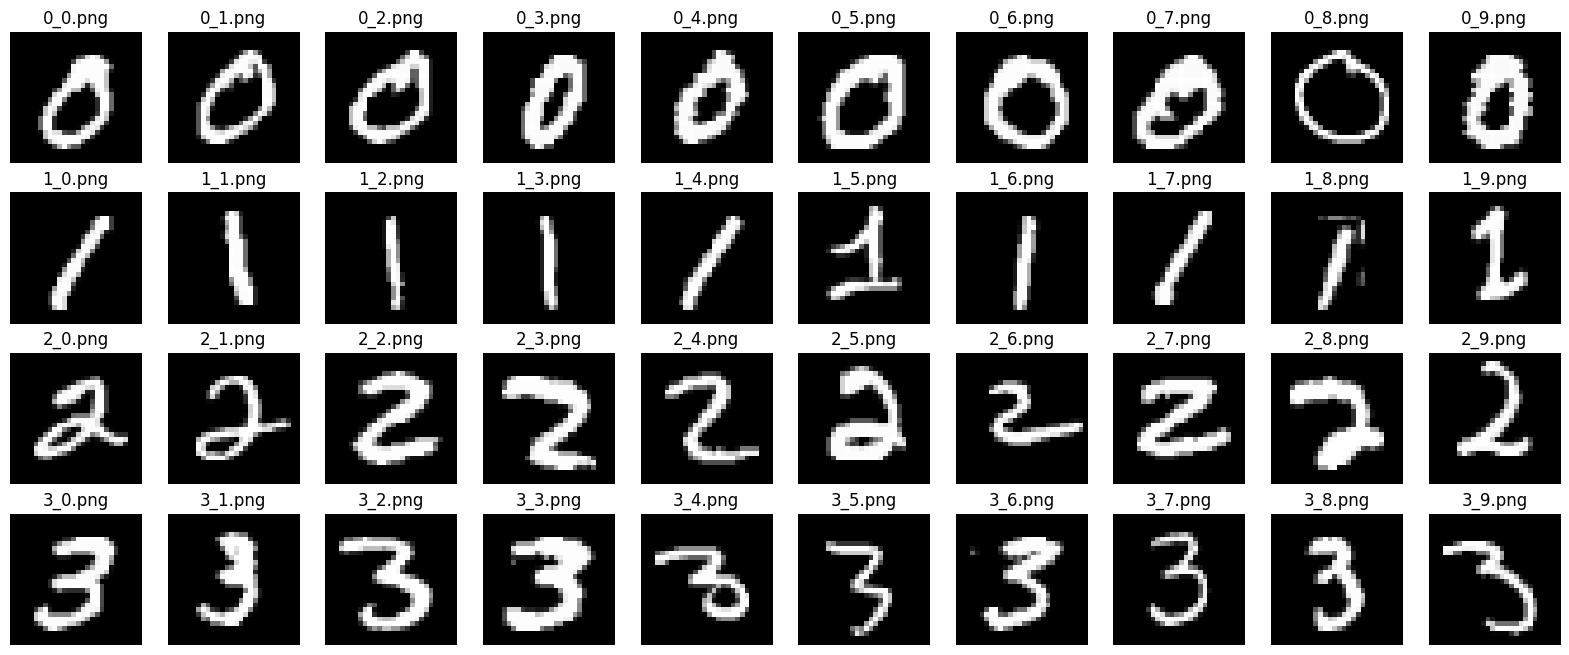

In [18]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import cv2




def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]  # make sure to only load .png
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection([os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names
                        
# Load digits data

# Zero images arrays
zeros_im, zeros_names = load(data_part1, digit='0')
# Ones images arrays
ones_im, ones_names = load(data_part1, digit='1')
# Twos images arrays
twos_im, twos_names = load(data_part2, digit='2')
# Threes images arrays
threes_im, threes_names = load(data_part2, digit='3')

# Plot images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(20, 8))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[2], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

---
## Part 1 - contour based descriptors (18 pts)

In this part you will use images of "0"s and "1"s.

**Objectives overview**: Fourier Descriptors


**1)** *Preprocess*: Select ONLY "0" and "1" images and apply suitable preprocessing. Show a plot with the preprocessed data and give arguments on the chosen techniques. (**2 pts**)


**2)** *Get descriptors*: Find the contours and get the Fourier descriptors in complex definition. *Note*: The contours arrays should contain a finite number (N-> self-chosen) of equi-distant points for each image (hint: interpolation). In the case of the "0" contours, just keep the outermost contour. Discuss the necessity of this format. (**4 pts**)
    
    
**3)** *Study effect of descriptors* : Show the contour-reconstruction of the digits using different amount of descriptors (both for ONE "0" image and ONE "1" image)
- Make 5 plots, reconstructing the digits' countours using different amounts of descriptors. (e.g. reconstruct the contour using the only the 1st fourier descriptor, reconstruct using the first two fourier descriptors,  using the first three ...)  
- **Hint**: check scipy fft, ifft, and fftfreq functions (see [link](https://docs.scipy.org/doc/scipy/tutorial/fft.html)) and pay attention on the ordering, observing which coefficients correspond to positive/negative frequencies of components and how you choose your low frequency subsets . 
- **Extra hint** To reconstruct the contour, copy the original vector of the fourier descriptors, keep the positive an negative frequencies you will use, and set to 0 the rest. (e.g. If you want to reconstruc the image with the first _three fourier descriptors_, keep the first _three positive frecuencies_ and their respective _three negative frequencies_ (see positive and negative bin freque
    frequencies [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ). 
- Discuss about your findings. (**4 pts**)
    
        
**4)** *Clustering*: For each image containing a "0" or a "1", using the fourier descriptors, extract a 2-dimensional feature vector (using the THE POSITIVE bin frequencies from fftfreq, see [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ) and plot all of them on a 2D graph. Did you obtain a plot where the vectors of the "0"'s nicely cluster in one part of the plane and those of the "1"'s in the other? If yes, explain why. (**2 pts**)
    
    
**5)** *Show translation, rotation and scale invariance*
- Firstly, discuss which descriptors, or which part of the descriptors are affected by each transformation. For each transformation define (write in words) an operation which will be applied to the descriptor arrays, such that they will be invariant to (not affected by) the specific transformation anymore. After finding the necessary operations, define a function that will make the Fourier descriptors invariant to all the transformations, altogether.(**3 pts**) 
- Secondly, show that if you are using descriptors invariant to transformations, you still obtain 2 nicely defined clusters for the 2 categories of numbers, under transformations applied. (You need to define custom functions for each transformation, apply them on images, and compare the obtained invariant descriptors). Discuss your findings. (**3 pts**)

### 1. Fourier Descriptors

### 1.1. Preprocess and visualization (2 pts)

In [19]:
# TODO

# Ludo: What is meant by preprocessing ? j'avais l'idée de faire un thresholding pour renforcer les pixels
# blancs sur les pixels noirs, mais je ne sais pas si c'est ce qui est attendu

# Faire un truc du genre:
def keep_white(image, threshold):
    return image > threshold

# Ludo: ou alors on repars dans un delire en mode trouver les best thresholds mdrr (non.)

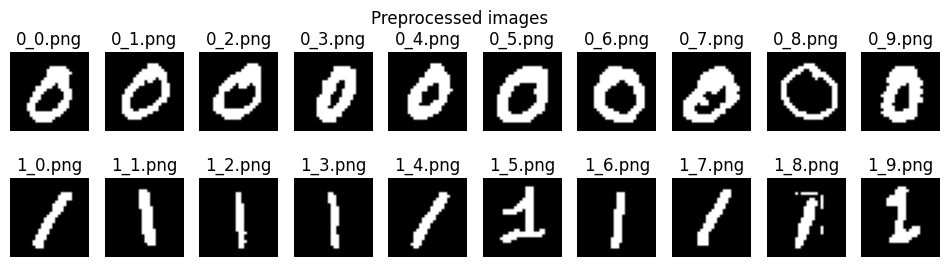

In [20]:
# TODO: Fill the lists below with your preprocessed images of "0"s and "1"s  
zeros = []
ones = []

# Ludo: du coup ca donnerais ca juste en dessosu
zeros = keep_white(zeros_im,50)
ones = keep_white(ones_im,50)
# Ludo: le resultat est pas mal en vrai, pourquoi pas

# Plot images
fig, axes = plt.subplots(2, len(zeros), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

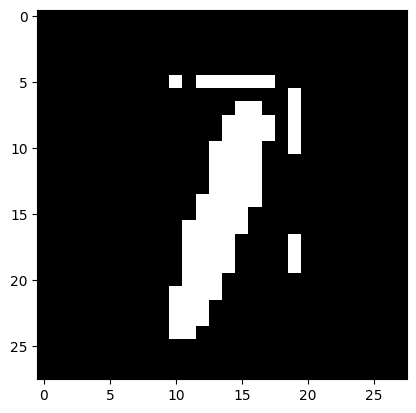

In [21]:
plt.imshow(ones[8], cmap='gray')

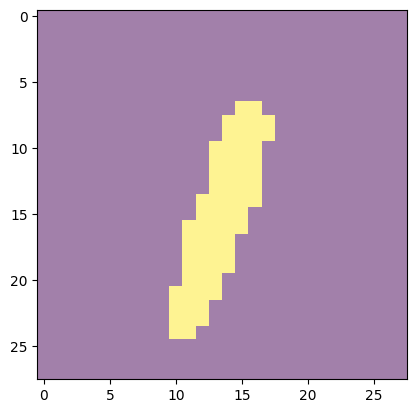

In [22]:
from skimage.morphology import remove_small_holes, remove_small_objects

rmv_objects_mask = remove_small_objects(ones[8], 20, connectivity=2)
plt.imshow(rmv_objects_mask, alpha=0.5, interpolation='nearest')

#### Discussion

[TODO]

### 1.2. Get descriptors (4 pts)

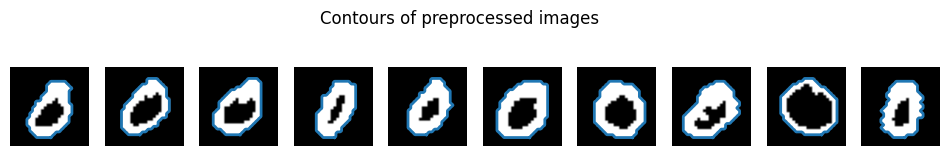

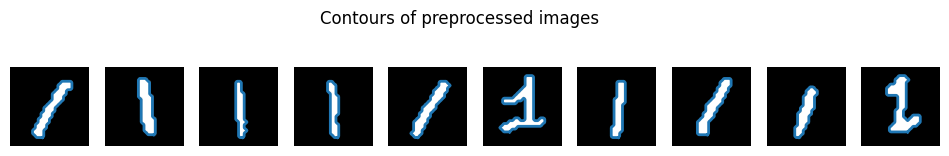

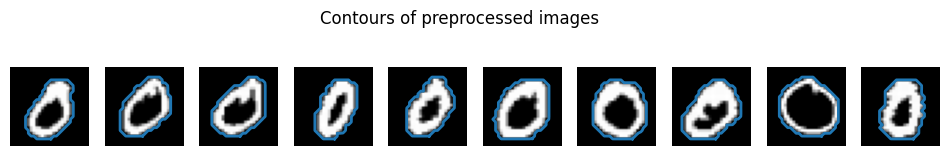

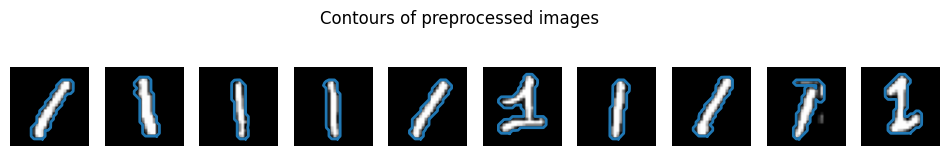

In [23]:
from skimage import measure

for i, zero in enumerate(zeros):
    zeros[i] = remove_small_objects(zero, 20, connectivity=2)

for i, one in enumerate(ones):
    ones[i] = remove_small_objects(one, 20, connectivity=2)


# Function to get the contours of a set of images using skimage
def get_contours(set):
    # Find contours of pixels with value >= 0.8 (take only the first contour that appears [0])
    contours = [measure.find_contours(img, 0.5)[0] for img in set]
    return contours

# Function to plot the contours of a set of images
def plot_contours(set): 
    
    # Get contours first
    contours = get_contours(set)

    # Then plot
    fig, axes = plt.subplots(1, len(set), figsize=(12, 2))
    for ax, img, contour in zip(axes, set, contours):
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    fig.suptitle("Contours of preprocessed images")
    plt.show()

plot_contours(zeros)
plot_contours(ones)
plot_contours(zeros_im)
plot_contours(ones_im)



## Explanation for Fourier descriptors

The index of each element of the Fourier coefficient array corresponds to a specific harmonic of the Fourier series expansion of the contour. The frequency of each harmonic is determined by its index in the array and the length of the contour. Specifically, the frequency of the n-th harmonic is given by n / L, where L is the length of the contour.

Therefore, the n-th element of the Fourier coefficient array corresponds to a frequency of n/L cycles per contour length, not necessarily the value of n itself.

In summary, the index of an element in the Fourier coefficient array corresponds to a specific harmonic of the Fourier series expansion of the contour, and the frequency of each harmonic is determined by its index and the length of the contour.

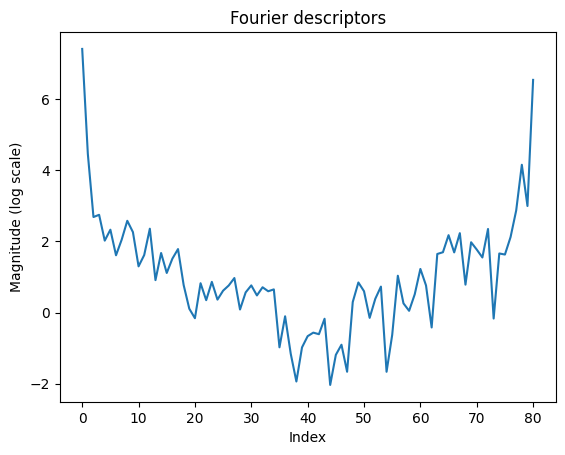

[[7.3387895]
 [4.8194337]
 [3.4642909]
 [1.5267441]
 [2.3967357]
 [2.5607142]
 [2.2122278]
 [2.1800117]
 [1.9406009]
 [0.9673308]]


In [24]:
# Function that takes as input an image and returns a set of descriptors. 
# You may use other custom helper functions to break the code into useful chuncks.

# TODO

def get_descriptors(img):
    # Compute the Fourier descriptors using complex definition
    contours = get_contours(img)
    fourier_coef = []
    for contour in contours:
        coutours_table =[]
        for item in contour:
            coutours_table.append([[item[0],item[1]]])

        fourier_desc = cv2.dft(np.float32(coutours_table), flags=cv2.DFT_COMPLEX_OUTPUT)

        # Normalize the Fourier descriptors
        fourier_desc_norm = cv2.magnitude(fourier_desc[:, :, 0], fourier_desc[:, :, 1])

        # Convert the Fourier descriptors to logarithmic scale
        fourier_desc_log = np.log(fourier_desc_norm)

        fourier_coef.append(fourier_desc_log)

    # Display the Fourier descriptors
    plt.plot(fourier_desc_log)
    plt.title('Fourier descriptors')
    plt.xlabel('Index')
    plt.ylabel('Magnitude (log scale)')
    plt.show()
    return fourier_coef

# Check first 10 descriptors of a test image (just to check that your pipeline works well)
print(get_descriptors(zeros)[0][:10])

In [25]:
from scipy.fftpack import fft2, ifft2

def reconstruction(img, size):
    # Load an image and extract the contour points
    contour = measure.find_contours(img, 0.5)[0] 

    # Compute the complex Fourier descriptors of the contour
    complex_fourier_coeffs = fft2(contour)

    # Define the number of Fourier descriptors to keep

    # Zero out all but the first num_descriptors coefficients
    complex_fourier_coeffs[size+1:-size] = 0

    # Compute the inverse Fourier transform of the modified coefficients
    reconstructed_contour = np.real(ifft2(complex_fourier_coeffs))

    # Display the original and reconstructed contours
    import matplotlib.pyplot as plt
    plt.figure(figsize=(7,4))

    plt.subplot(1,2,1)
    plt.plot(contour[:,1], contour[:,0])
    plt.axis('equal')
    plt.title('Original Contour')

    plt.subplot(1,2,2)
    plt.plot(reconstructed_contour[:,1], reconstructed_contour[:,0])
    plt.axis('equal')
    plt.title('Reconstructed with {} descriptors'.format(size))

    plt.show()
    return reconstructed_contour

#### Discussion

TODO

### 1.3. Study effect of descriptors (6 pts)

In [26]:
# Define increasing set sizes of the descriptors. You can also change these numbers.
descr_set_sizes = [1, 2, 5, 10, 20]

# Define images for which you will show the recovery. You can also change the indexes.
zero = zeros_im[3]
one = ones_im[3]

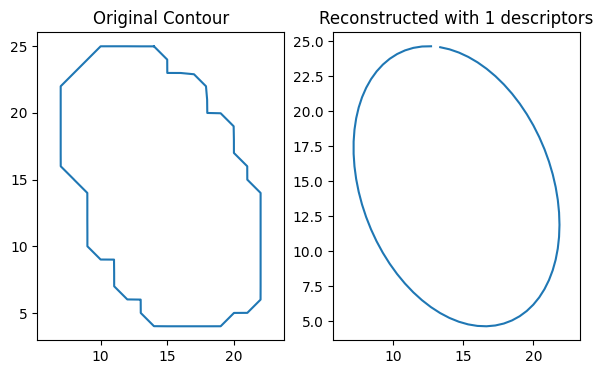

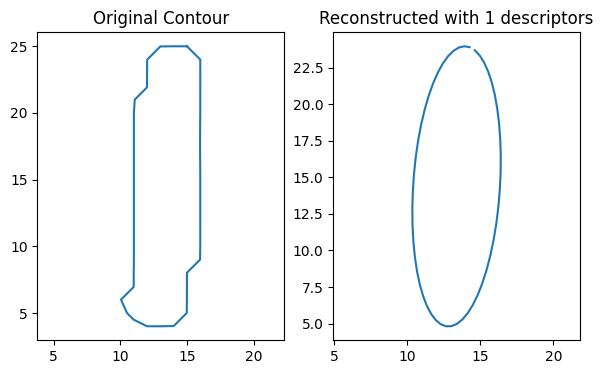

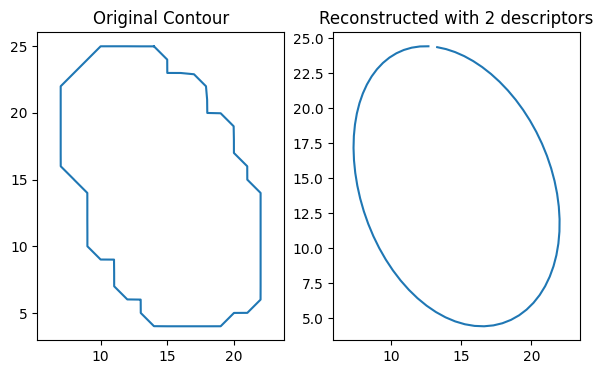

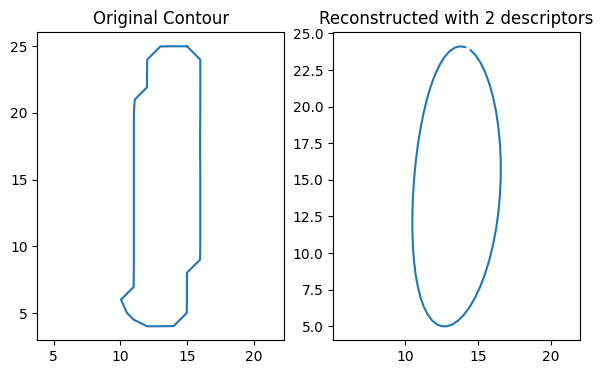

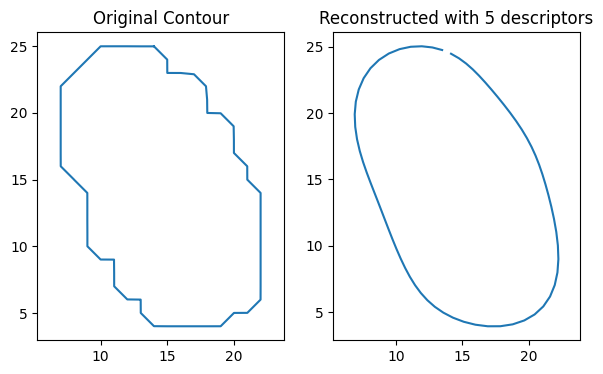

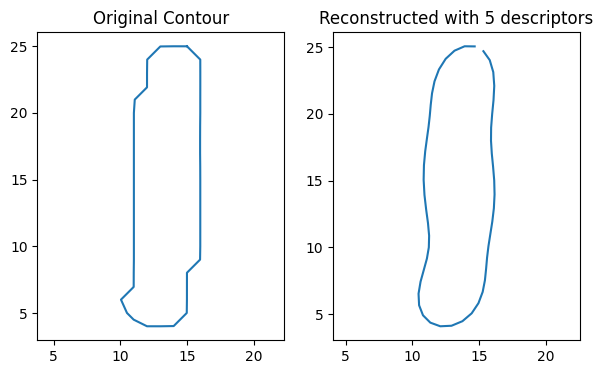

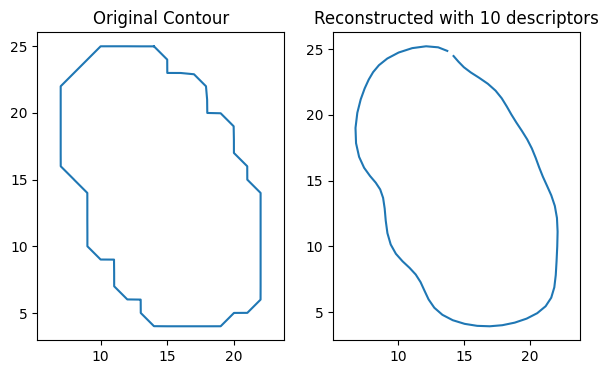

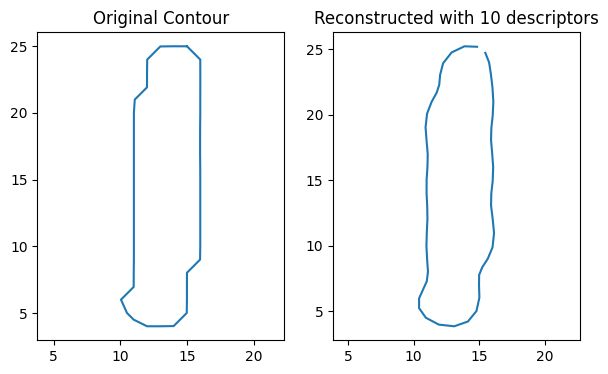

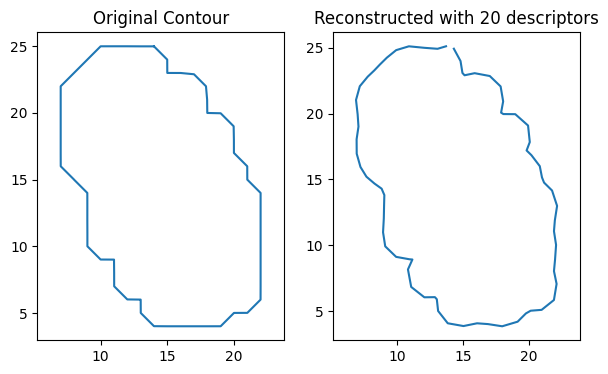

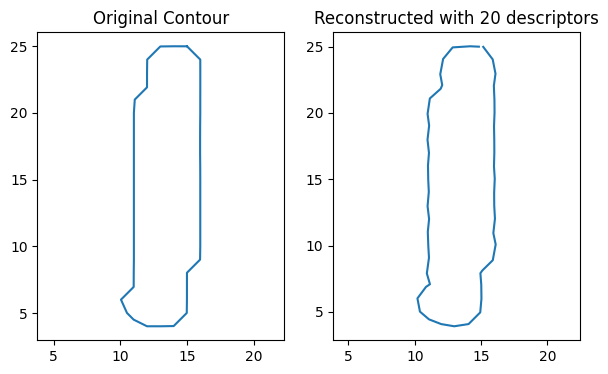

In [27]:
# TODO
for size in descr_set_sizes:
    # Get descriptors of the images
    zero_desc = reconstruction(zero, size)
    one_desc = reconstruction(one, size)

#### Discussion

TODO

### 1.4 Clustering (2 pts)

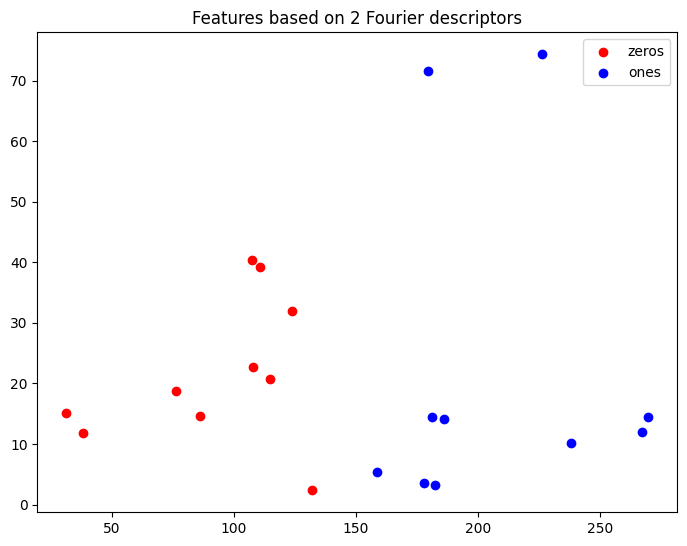

In [28]:
#cluster with magnitude of the two first Fourier descriptors
# First feature for all "0"s
zeros_f1 = []
# Second feature for all "0"s
zeros_f2 = []
# Fist feature for all "1"s
ones_f1 = []
# Second feature for all "1"s
ones_f2 = []

zeros = keep_white(zeros_im,50)
ones = keep_white(ones_im,50)

for i, zero in enumerate(zeros):
    zeros[i] = remove_small_objects(zero, 20, connectivity=2)

for i, one in enumerate(ones):
    ones[i] = remove_small_objects(one, 20, connectivity=2)


contour0 = get_contours(zeros)
contour1 = get_contours(ones)

for contour_0, contour_1 in zip(contour0, contour1):
    # compute the Fourier descriptors
    descriptors0 = np.fft.fft(contour_0[:,0] + 1j*contour_0[:,1])
    descriptors1 = np.fft.fft(contour_1[:,0] + 1j*contour_1[:,1])
    
    # compute the magnitudes of the first two descriptors
    mags0 = np.abs(descriptors0[1:3])
    mags1 = np.abs(descriptors1[1:3])
    
    # add the feature vectors
    zeros_f1.append(mags0[0])
    zeros_f2.append(mags0[1])
    ones_f1.append(mags1[0])
    ones_f2.append(mags1[1])

# octa : pas sur de ce que je fait, tests

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
ax.scatter(ones_f1, ones_f2, color='b', label='ones')
ax.legend(loc='best')
plt.title("Features based on 2 Fourier descriptors")
plt.show()

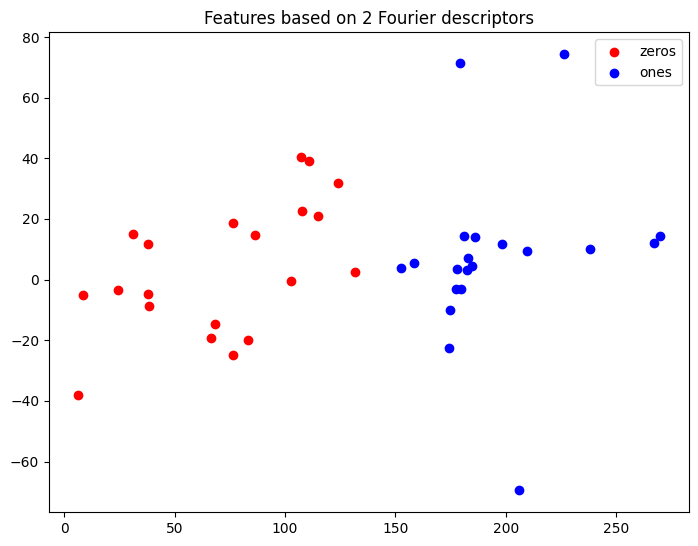

In [29]:
#cluster with real part of the first two descriptors
for contour_0, contour_1 in zip(contour0, contour1):
    # compute the Fourier descriptors
    descriptors0 = np.fft.fft(contour_0[:,0] + 1j*contour_0[:,1])
    descriptors1 = np.fft.fft(contour_1[:,0] + 1j*contour_1[:,1])
    
    # compute the magnitudes of the first two descriptors
    mags0 = np.abs(descriptors0[1:3])
    mags1 = np.abs(descriptors1[1:3])
    # add the feature vectors
    zeros_f1.append(descriptors0[1].real)
    zeros_f2.append(descriptors0[2].real)
    ones_f1.append(descriptors1[1].real)
    ones_f2.append(descriptors1[2].real)


# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
ax.scatter(ones_f1, ones_f2, color='b', label='ones')
ax.legend(loc='best')
plt.title("Features based on 2 Fourier descriptors")
plt.show()

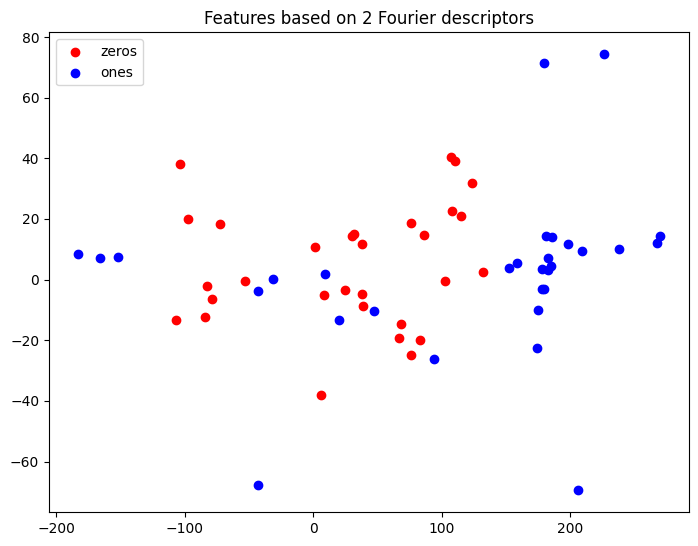

In [30]:
#cluster with imaginary part of the two first descriptors
for contour_0, contour_1 in zip(contour0, contour1):
    # compute the Fourier descriptors
    descriptors0 = np.fft.fft(contour_0[:,0] + 1j*contour_0[:,1])
    descriptors1 = np.fft.fft(contour_1[:,0] + 1j*contour_1[:,1])
    
    # compute the magnitudes of the first two descriptors
    mags0 = np.abs(descriptors0[1:3])
    mags1 = np.abs(descriptors1[1:3])
    # add the feature vectors
    zeros_f1.append(descriptors0[1].imag)
    zeros_f2.append(descriptors0[2].imag)
    ones_f1.append(descriptors1[1].imag)
    ones_f2.append(descriptors1[2].imag)


# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
ax.scatter(ones_f1, ones_f2, color='b', label='ones')
ax.legend(loc='best')
plt.title("Features based on 2 Fourier descriptors")
plt.show()

#### Discussion


TODO

### 1.5 Transformation invariance (6 pts)

#### Preliminary discussion

TODO

#### Implementation

In [32]:
# TODO: Implement a function that takes as input an image and outputs 
# a set of features invariant to scale, rotation and translation, according to function boolean parameters.
# You may use your functions defined in section 1.B.

def get_invariant_features(img, inv_to_rotation=False, inv_to_translation=False, inv_to_scale=False):
    pass

In [33]:
len(zeros)

10

In [34]:
import random
import scipy.ndimage

# Define custom rotation function. You may add other parameters to the function.
def random_rotate(img):
    angle = random.randint(0,360)
    return scipy.ndimage.rotate(img, angle, mode='nearest', reshape=True)

# Define custom rotation function. You may add other parameters to the function.
def random_translate(img):
    x = random.randint(-5,5)
    y = random.randint(-5,5)
    h, w = img.shape[:2]
    T = np.float32([[1,0,x],[0,1,y]])
    return cv2.warpAffine(img,T,(w,h))
    
# Define custom rotation function. You may add other parameters to the function.
def random_scale(img):
    h, w = img.shape[:2]
    scale = random.randint(75,150)
    img = cv2.resize(img, (int(w*scale/100), int(h*scale/100)), interpolation=cv2.INTER_AREA)
    nh, nw = img.shape[:2]
    bord_w = int((nw-w)/2)
    bord_h = int((nh-h)/2)
    return img[bord_w:nw-bord_w, bord_h:nh-bord_h]

In [39]:
# We will define 4 sets of new images below

# TODO: Apply only rotation for each "0" and "1" and store results below
rotated_images_zeros = []
for im in zeros_im:
    rotated_images_zeros.append(random_rotate(im))
rotated_images_ones = []
for im in ones_im:
    rotated_images_ones.append(random_rotate(im))

# TODO: Apply only translation for each "0" and "1" and store results below
translated_images_zeros = []
for im in zeros_im:
    translated_images_zeros.append(random_translate(im))
translated_images_ones = []
for im in ones_im:
    translated_images_ones.append(random_translate(im))

# TODO: Apply only scaling for each "0" and "1" and store results below
scaled_images_zeros = []
for im in zeros_im:
    scaled_images_zeros.append(random_scale(im))
scaled_images_ones = []
for im in ones_im:
    scaled_images_ones.append(random_scale(im))

# TODO: Apply all 3 transformations sequentially, in your custom order, for each "0" and "1" and store results below
transformed_images_zeros = []
for im in zeros_im:
    transformed_images_zeros.append(random_scale(random_translate(random_rotate(im))))
transformed_images_ones = []
for im in ones_im:
    transformed_images_ones.append(random_scale(random_translate(random_rotate(im))))

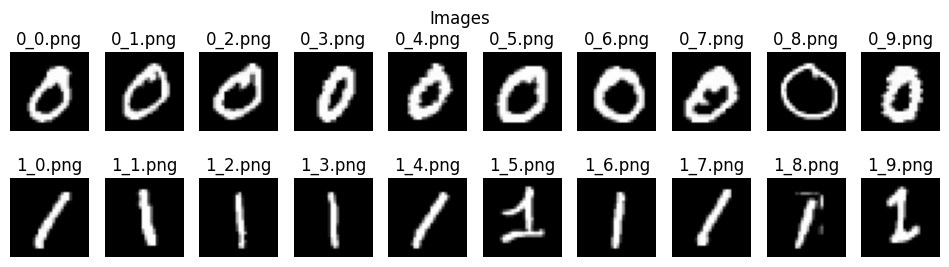

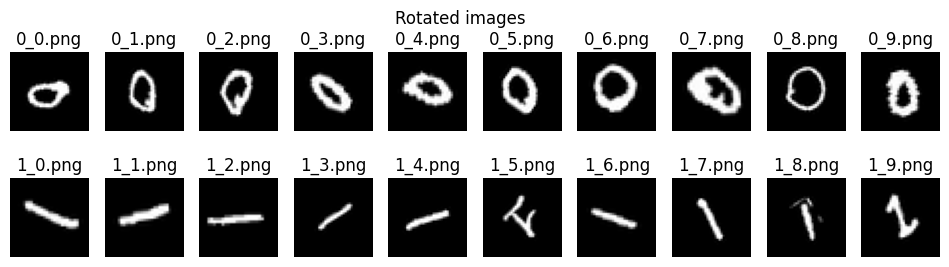

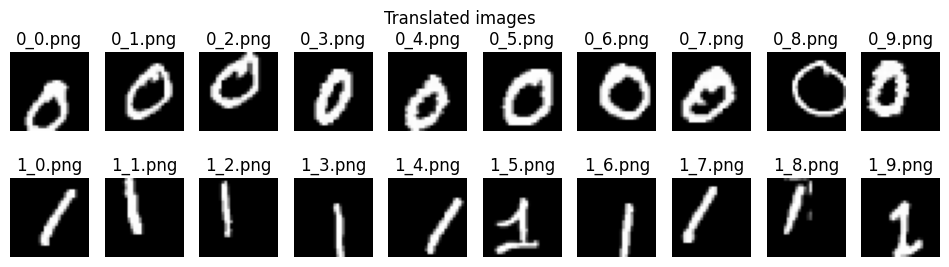

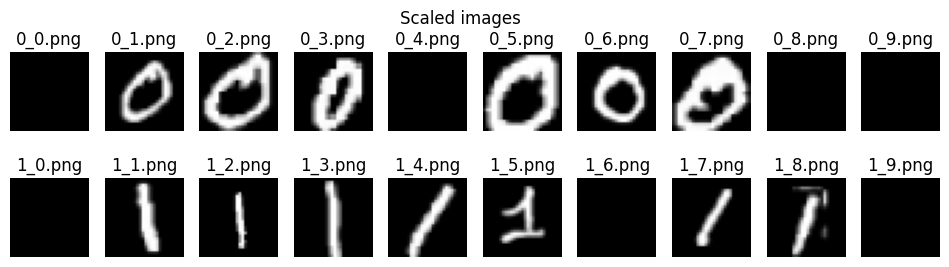

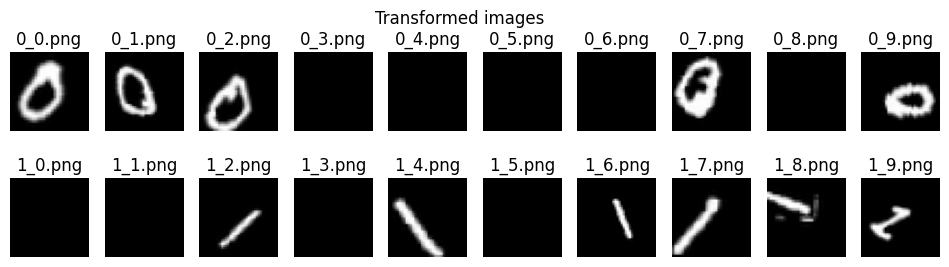

In [40]:
# For each of the 4 sets of "0"s and "1"s above, you should find the invaiant features
# and make a plot (similar to section 1.4) - 4 plots in total!
# Use a proper labeling/legend for the plots!
# TODO

# Plot images
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Images")
plt.show()

# Plot rotated images
fig, axes2 = plt.subplots(2, len(rotated_images_zeros), figsize=(12, 3))
for ax2, im, nm in zip(axes2[0], rotated_images_zeros, zeros_names):
    ax2.imshow(im, cmap='gray')
    ax2.axis('off')
    ax2.set_title(nm)
for ax2, im, nm in zip(axes2[1], rotated_images_ones, ones_names):
    ax2.imshow(im, cmap='gray')
    ax2.axis('off')
    ax2.set_title(nm)
fig.suptitle("Rotated images")
plt.show()

# Plot translated images
fig, axes2 = plt.subplots(2, len(translated_images_zeros), figsize=(12, 3))
for ax2, im, nm in zip(axes2[0], translated_images_zeros, zeros_names):
    ax2.imshow(im, cmap='gray')
    ax2.axis('off')
    ax2.set_title(nm)
for ax2, im, nm in zip(axes2[1], translated_images_ones, ones_names):
    ax2.imshow(im, cmap='gray')
    ax2.axis('off')
    ax2.set_title(nm)
fig.suptitle("Translated images")
plt.show()

# Plot scaled images
fig, axes2 = plt.subplots(2, len(scaled_images_zeros), figsize=(12, 3))
for ax2, im, nm in zip(axes2[0], scaled_images_zeros, zeros_names):
    ax2.imshow(im, cmap='gray')
    ax2.axis('off')
    ax2.set_title(nm)
for ax2, im, nm in zip(axes2[1], scaled_images_ones, ones_names):
    ax2.imshow(im, cmap='gray')
    ax2.axis('off')
    ax2.set_title(nm)
fig.suptitle("Scaled images")
plt.show()

# Plot transformed images
fig, axes2 = plt.subplots(2, len(transformed_images_zeros), figsize=(12, 3))
for ax2, im, nm in zip(axes2[0], transformed_images_zeros, zeros_names):
    ax2.imshow(im, cmap='gray')
    ax2.axis('off')
    ax2.set_title(nm)
for ax2, im, nm in zip(axes2[1], transformed_images_ones, ones_names):
    ax2.imshow(im, cmap='gray')
    ax2.axis('off')
    ax2.set_title(nm)
fig.suptitle("Transformed images")
plt.show()

In [43]:
trans_zeros = keep_white(transformed_images_zeros,150)
trans_ones = keep_white(transformed_images_ones,150)

# Plot images
fig, axes = plt.subplots(2, len(trans_zeros), figsize=(12, 3))
for ax, im, nm in zip(axes[0], trans_zeros, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], trans_ones, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

TypeError: '>' not supported between instances of 'list' and 'int'

#### Discussion

TODO

## PART 2 - region based descriptors (10 pts)

In this part, you will use the "2"s and "3"s images.

**Objectives overview**:

**1)** *Cluster on compacity*: Based on custom definitions of perimeter and area for each image of "2" and "3" (preprocessed - by you), make a 2D plot with 2-dimensional feature vectors, similar to section 1.4. After that, define the compacity feature for each "2"s and "3"s image. Are you still able to obtain a 1D plot with values clustered in 2 well-defined regions? Discuss your findings. (**6 pts**).

**2)** *Additional method*: Choose one more region-based method (from the course or your own sources - internet allowed) and redo the 1D plot in section 2.1 (or 2D plot, depending on your choosing). Explain your method and your findings. (**4 pts**)

### 2.3. Cluster on compacity (6 pts)

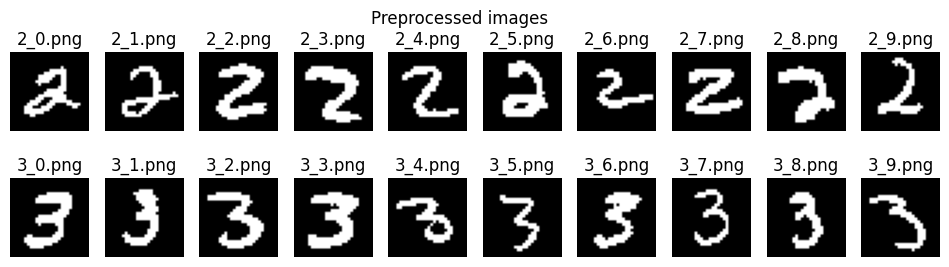

In [ ]:
# TODO
twos = remove_small_objects(keep_white(twos_im,100), 10)
threes = remove_small_objects(keep_white(threes_im,100), 10)

# Plot images
fig, axes = plt.subplots(2, len(twos), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

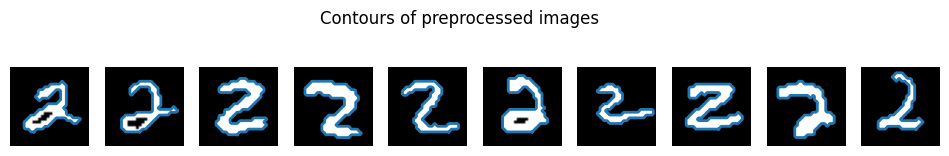

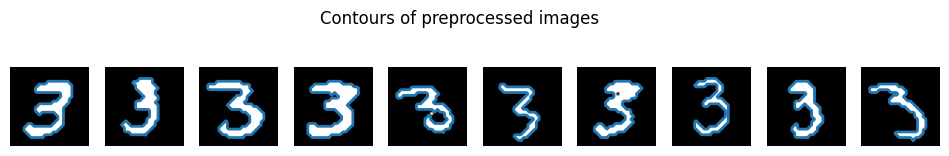

In [ ]:
# Plot the contours of the images
plot_contours(twos)
plot_contours(threes)

In [ ]:
# To compute the compacity --> get the area and perimeter of the figures

def get_area(set):
    # Chose to compute the area as the number of white pixels in the image
    area = []
    for im in set:
        area.append(np.sum(im))
    return np.array(area)

def get_perimeter(set):
    # Chose to compute the perimeter as the number of points in the contour
    return np.array([len(cnt) for cnt in get_contours(set)])

In [ ]:
A2 = get_area(twos)
P2 = get_perimeter(twos)
compacity2 = P2**2/A2

A3 = get_area(threes)
P3 = get_perimeter(threes)
compacity3 = P3**2/A3


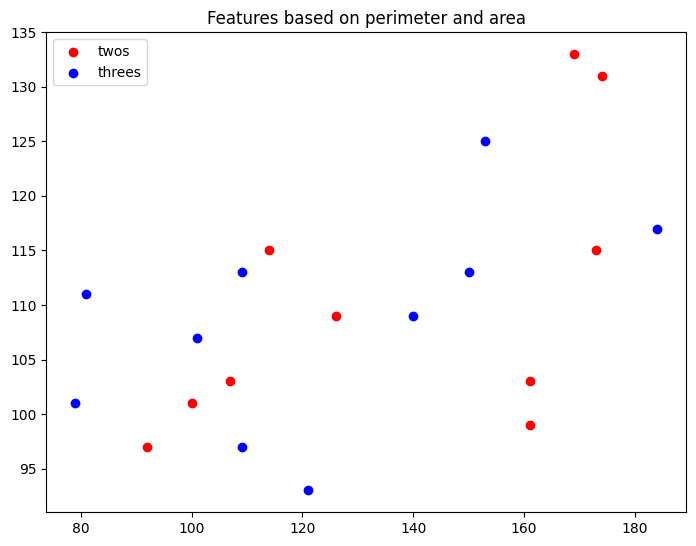

In [ ]:
# TODO: Fill the arrays below with the perimeter and area as features for "2"s and "3"s images
twos_f1 = A2
twos_f2 = P2
threes_f1 = A3
threes_f2 = P3

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_f1, twos_f2, color='r', label='twos')
ax.scatter(threes_f1, threes_f2, color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on perimeter and area")
plt.show()

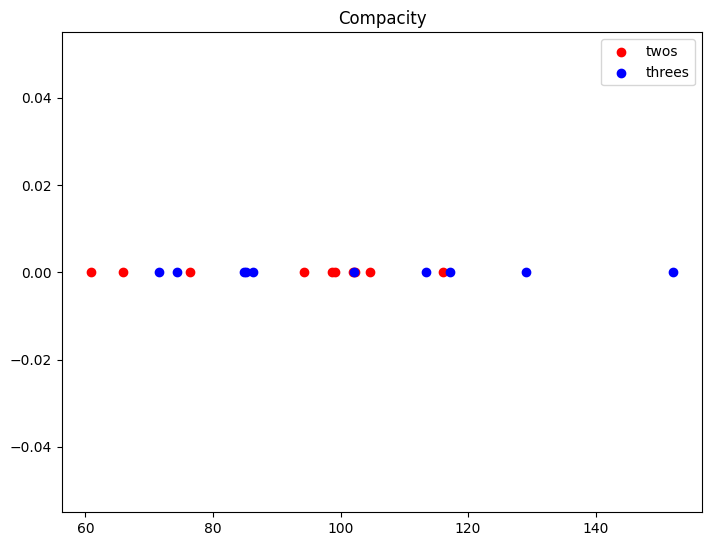

In [ ]:
# TODO: Make the 1D plot of the compacity
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(compacity2, np.zeros(len(compacity2)), color='r', label='twos')
ax.scatter(compacity3, np.zeros(len(compacity3)), color='b', label='threes')
ax.legend(loc='best')
plt.title("Compacity")
plt.show()

####  Discussion

TODO

### 2.2. Additional method (4 pts)

In [ ]:
# TODO

#### Discussion

TODO